In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import random
import torch
df = pd.read_csv('/content/drive/MyDrive/SGA/withBiomarker/cleaned_first_scan.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   108 non-null    int64  
 1   hos_no                       108 non-null    int64  
 2   m_race                       108 non-null    int64  
 3   m_weight                     108 non-null    float64
 4   m_height                     108 non-null    float64
 5   m_age                        108 non-null    float64
 6   conception                   108 non-null    int64  
 7   f_age                        108 non-null    int64  
 8   f_smoking                    108 non-null    int64  
 9   f_alcohol                    108 non-null    int64  
 10  hb                           108 non-null    float64
 11  past_diabetes                108 non-null    int64  
 12  past_sga                     108 non-null    int64  
 13  past_gender         

In [4]:
def seed_everything(seed):
  np.random.seed(42)

  # Set the seed for random library
  random.seed(42)

  # Set the seed for PyTorch
  torch.manual_seed(42)
  torch.cuda.manual_seed(42)
  torch.cuda.manual_seed_all(42)  # If using multiple GPUs
  torch.backends.cudnn.deterministic = True  # Ensures repeatability
  torch.backends.cudnn.benchmark = False  # Disables auto-tuning for consistency


In [5]:
def scale_feature(col, method='std'):
    if method == 'std':
        std = np.std(col)
        mean = np.mean(col)
        return (col - mean) / std
    elif method =='minmax':
        min = np.min(col)
        max = np.max(col)
        return (col - min) / max

In [6]:
cont_col = ['m_weight', 'm_height', 'm_age', 'f_age', 'hb', 'past_bw',
            'left_arm_systolic_bp_1', 'left_arm_systolic_bp_2', 'left_arm_diastolic_bp_1',
            'left_arm_diastolic_bp_2', 'right_arm_systolic_bp_1', 'right_arm_systolic_bp_2',
            'right_arm_diastolic_bp_1', 'right_arm_diastolic_bp_2', 'papp-a',
            'free_beta_hcg', 'crl', 'nt', 'fetal_heart_rate', 'uapi_left', 'uapi_right',
            'down\'s_syndrome', 'edward\'s_and_patau_syndrome', 'ga']

df[cont_col] = scale_feature(df[cont_col], method='std')

In [7]:
df.drop(['Unnamed: 0', 'hos_no', 'previous_failed_pregnancy', 'm_race', 'f_smoking', 'right_arm_systolic_bp_1', 'past_diabetes', 'past_gender', 'right_arm_diastolic_bp_1', 'past_sga', 'left_arm_systolic_bp_1', 'm_weight', 'right_arm_diastolic_bp_2', 'conception', 'm_age'], axis = 1, inplace = True)
#df.drop(['Unnamed: 0', 'hos_no'], axis = 1, inplace = True)

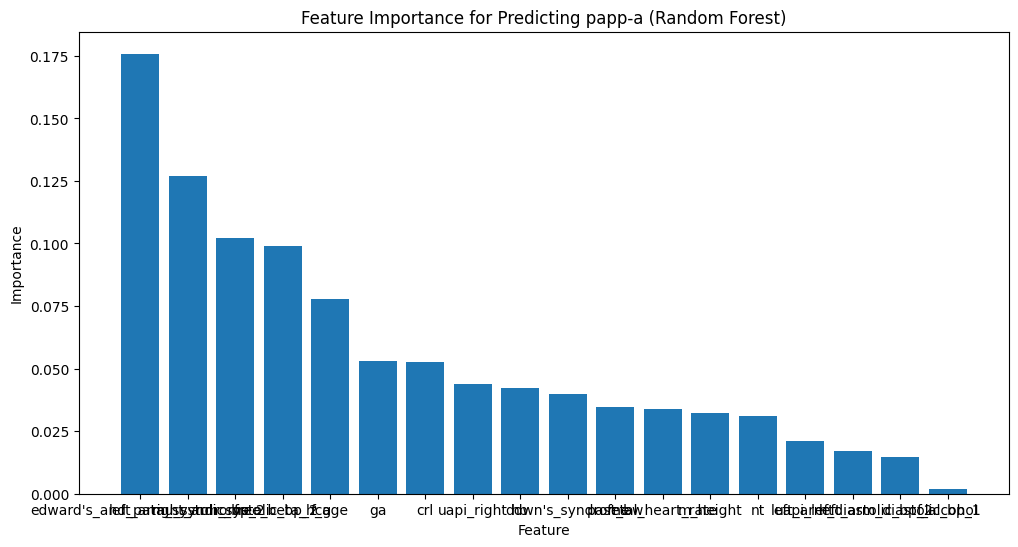

                        Feature  Importance
16  edward's_and_patau_syndrome    0.175910
5        left_arm_systolic_bp_2    0.126936
8       right_arm_systolic_bp_2    0.102359
9                 free_beta_hcg    0.098896
1                         f_age    0.077801
17                           ga    0.053076
10                          crl    0.052484
14                   uapi_right    0.043852
3                            hb    0.042224
15              down's_syndrome    0.039917
4                       past_bw    0.034588
12             fetal_heart_rate    0.033926
0                      m_height    0.032389
11                           nt    0.030906
13                    uapi_left    0.021075
7       left_arm_diastolic_bp_2    0.017066
6       left_arm_diastolic_bp_1    0.014707
2                     f_alcohol    0.001887


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your data
#df = pd.read_csv('/content/drive/MyDrive/SGA/withBiomarker/cleaned_first_scan.csv')

# Define the target variable (papp-a) and features (all except 'papp-a')
y = df["papp-a"]
X = df.drop(["papp-a"], axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for Predicting papp-a (Random Forest)")
plt.show()

print(importance_df)


Linear Regression: 1.2982685057165073
Decision Tree: 1.058609539155487
Random Forest: 0.4730683828166299
Gradient Boosting: 0.4611116586606405
Support Vector Machine: 0.7432149293511285
K-Nearest Neighbors: 0.6655604517029289


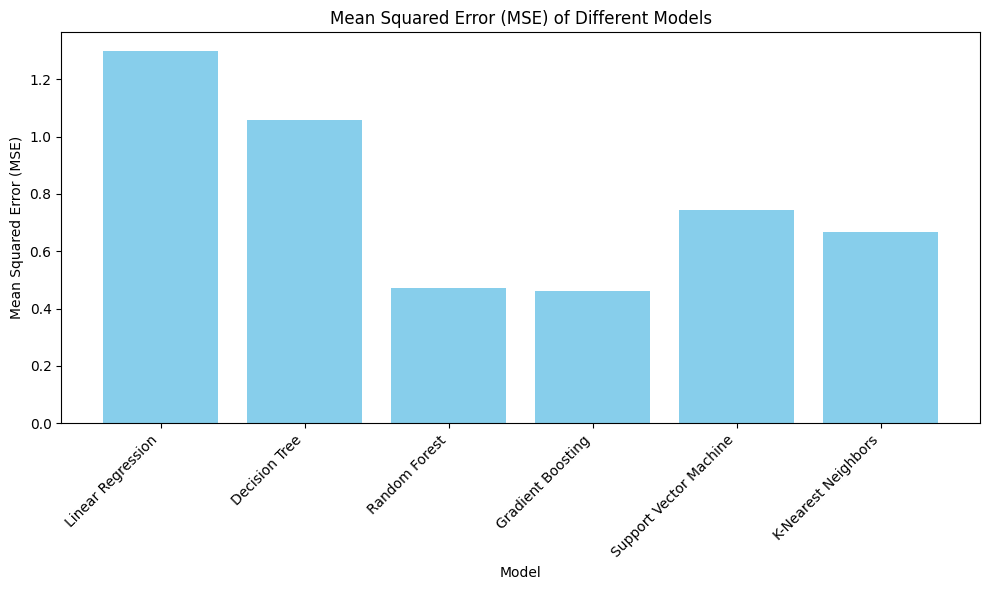

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

seed = 50
seed_everything(seed)

y = df["papp-a"]
X = df.drop(["papp-a"], axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = seed)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

mse_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores[name] = -scores.mean()

for name, mse in mse_scores.items():
    print(f"{name}: {mse}")

plt.figure(figsize=(10, 6))
plt.bar(mse_scores.keys(), mse_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
